# Lifespan of people born 1900

In this notebook we will use real data on lifespans for people who were born 1900 and died in Sweden. The data come from Sveriges dödbok (Swedish death index), and are provided by the Federation of Swedish Genealogical Societies https://www.rotter.se/swedish-roots

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## reset default values for font size
plt.rc('axes', titlesize=16) 
plt.rc('axes', labelsize=16) 

Load the file with dates of births and deaths: 

In [22]:
## location of the dataset
url="https://raw.githubusercontent.com/aledberg/methodology/main/born1900.csv"
## read this into a pandas dataframe
dat=pd.read_csv(url)

## look at the first 10 entries
print(dat.head(10))

    birthDate   deathDate sex
0  1900-01-25  1970-08-17   m
1  1900-01-13  1900-09-03   m
2  1900-01-22  1900-08-15   m
3  1900-01-06  1958-12-03   m
4  1900-01-08  1946-07-12   m
5  1900-01-25  1939-11-01   m
6  1900-01-07  1900-01-07   m
7  1900-01-06  1900-01-08   m
8  1900-01-29  1961-11-17   m
9  1900-01-26  1901-07-28   m


To compute the lifespan (date of death - date of birth) we need to convert the dates from string to datetime format. 

In [23]:
## convert string dates to datetime
dat['birthDate'] = pd.to_datetime(dat['birthDate'])
dat['deathDate'] = pd.to_datetime(dat['deathDate'])

## express the lifespan (age) in fractions of a year
dat['age']=((dat['deathDate']-dat['birthDate']).dt.days)/365.25

## look again at the first 10 rows
print(dat.head(10))

   birthDate  deathDate sex        age
0 1900-01-25 1970-08-17   m  70.557153
1 1900-01-13 1900-09-03   m   0.637919
2 1900-01-22 1900-08-15   m   0.561259
3 1900-01-06 1958-12-03   m  58.904860
4 1900-01-08 1946-07-12   m  46.505133
5 1900-01-25 1939-11-01   m  39.764545
6 1900-01-07 1900-01-07   m   0.000000
7 1900-01-06 1900-01-08   m   0.005476
8 1900-01-29 1961-11-17   m  61.798768
9 1900-01-26 1901-07-28   m   1.500342


Now we can make a histogram showing the distribution of lifespans in this cohort.

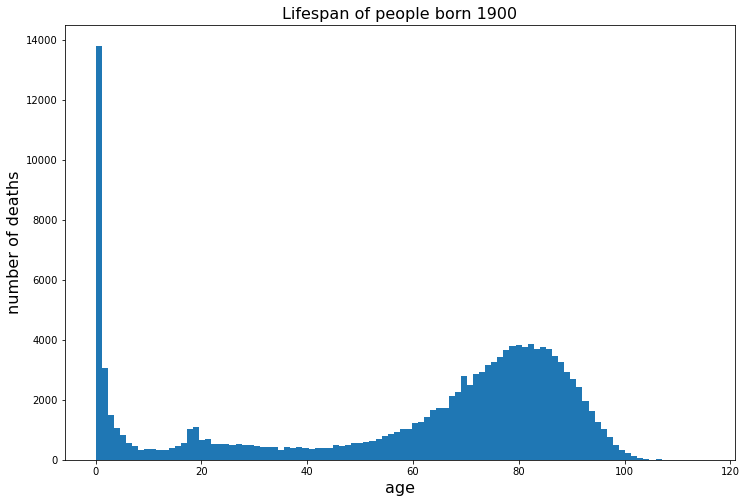

In [24]:
ax=dat.hist('age',bins=100,grid=False,figsize=(12,8))
ax=ax[0][0]
ax.set(xlabel="age", ylabel="number of deaths")
plt.title("Lifespan of people born 1900")
plt.show()

## Survival functions

The histogram makes it easy to see at what age the highest and lowest number of deaths occurred. It's harder to see what fraction of people in the cohort lived to be 60. Another representation of the data will make that easy: the survival function.

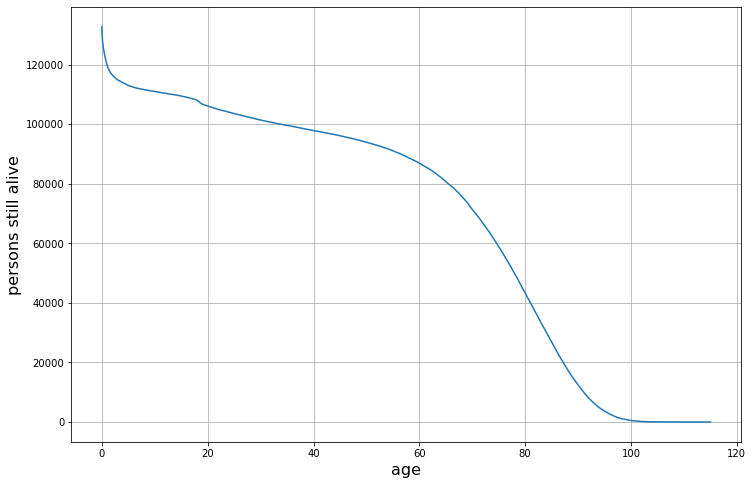

In [35]:
sortAge=dat['age'].sort_values()
nAlive=np.array([len(sortAge)-i for i in [*range(len(dat))]])
plt.figure(figsize=(12,8))
plt.plot(sortAge,nAlive)
plt.xlabel("age")
plt.ylabel("persons still alive")
plt.grid()
plt.show()

If we divide the number of people still alive with the total people in the cohort to start with, we get the survival function for the cohort. 

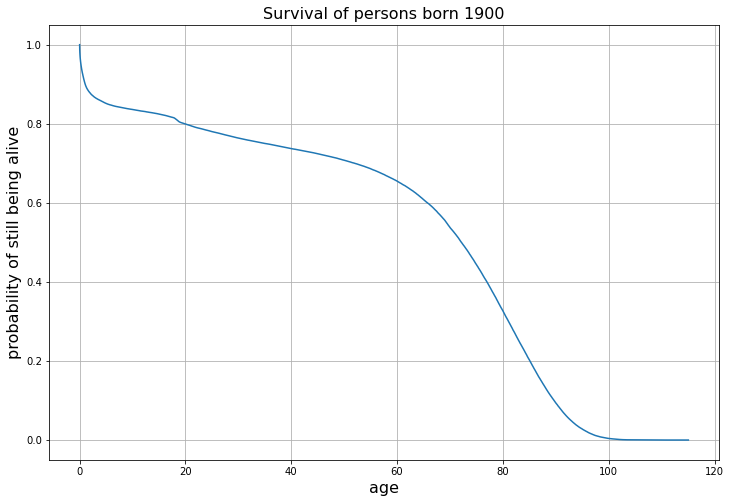

In [38]:
pAlive=nAlive/len(nAlive)
plt.figure(figsize=(12,8))
plt.plot(sortAge,pAlive)
plt.xlabel("age")
plt.ylabel("probability of still being alive")
plt.title("Survival of persons born 1900")
plt.grid()
plt.show()

### Questions: 
At what age had half the cohort died? <br> 
What was the probability of living until 20 years of age?

## Differences in survival between men and women
Let us next look at differences in survival between men and women. Do you think the survival functions differ? If so how? <br> Let's take a look:

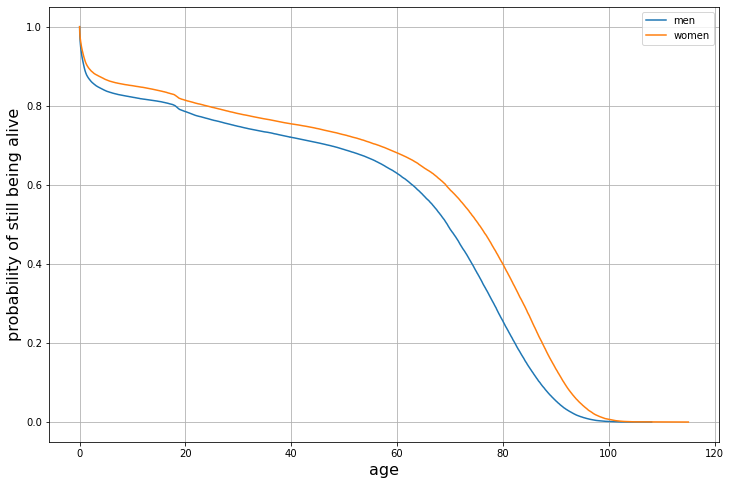

In [40]:
fig, ax = plt.subplots(figsize=(12,8))

## men
datm=dat[dat['sex']=="m"]
sortAge=datm['age'].sort_values()
nAlive=np.array([len(sortAge)-i for i in [*range(len(datm))]])
nAlive=nAlive/len(nAlive)
ax.plot(sortAge,nAlive)
## women
datw=dat[dat['sex']=="k"]
sortAge=datw['age'].sort_values()
nAlive=np.array([len(sortAge)-i for i in [*range(len(datw))]])
nAlive=nAlive/len(nAlive)
ax.plot(sortAge,nAlive)

plt.xlabel("age")
plt.ylabel("probability of still being alive")
plt.grid()
ax.legend(["men","women"])
plt.show()